In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import os
import pickle

In [4]:
## Plot the box plots of bootstrap results

In [5]:
# collect results

In [6]:
# list dir in

In [7]:
configs = ['no_constraint', 'unweighted_pdf_mode']
configs = ['unweighted_pdf_mode']

In [8]:
%%sh
ls ../bootstrap/

diffsign_2S2_unweighted_pdf_mode_gaussian_initskew_1_2_5
index.pickle


In [9]:
def addvar_prev_skeys(f):
    prev_skeys = []
    def _f(*args):
        return f(*args, prev_skeys)
    return _f

In [10]:
@addvar_prev_skeys
def load_dataset_res(dataset_name, basedir, prev_skeys = None):
    d = f'{basedir}/{dataset_name}'
    res = []
    keys = []
    
    for bsi in os.listdir(d):
        # print(bsi)
        bsi = int(bsi)
        if bsi in [0, 49]:
            continue
        skeys, r = load_bootstrap_i(bsi, d)
        if not prev_skeys:
            prev_skeys += skeys
        # assert skeys == prev_skeys, (prev_skeys, skeys)
        if skeys != prev_skeys:
            print(d, bsi)
        keys.append(bsi)
        res.append(r)
    return [keys, *skeys], res

In [11]:
@addvar_prev_skeys
def load_bootstrap_i(bsi, basedir, prev_skeys = None):
    d = f'{basedir}/{bsi}'
    res = []
    keys = []
    for skewinit in os.listdir(d):
        if not os.path.isdir(f'{d}/{skewinit}'):
            continue
        skeys, r = load_skewinit(skewinit, d)
        if not prev_skeys:
            prev_skeys += skeys
        # assert skeys == prev_skeys, (prev_skeys, skeys)
        if skeys != prev_skeys:
            print(d, skewinit)
        keys.append(skewinit)
        res.append(r)
    return [keys, *skeys], res

In [12]:
@addvar_prev_skeys
def load_skewinit(skewinit, basedir, prev_skeys = None):
    d = f'{basedir}/{skewinit}'
    # print(d)
    models = pickle.load(open(f'{d}/models.pickle', 'rb'))
    # print(len(models))
    assert(len(models) == 40)
    return [list(range(len(models)))], models

In [13]:
@addvar_prev_skeys
def load_config_res(config, nsample, basedir, prev_skeys = None):
    d = f'{basedir}/diffsign_{nsample}S2_{config}_gaussian_initskew_1_2_5'
    res = []
    keys = []
    for dataset in os.listdir(d):
        # if dataset == 'ALott':
        #     continue
        print(dataset)
        skeys, r = load_dataset_res(dataset, d)
        if not prev_skeys:
            prev_skeys += skeys
        # assert skeys == prev_skeys, (prev_skeys, skeys)
        if skeys != prev_skeys:
            print(d, dataset)
        keys.append(dataset)
        res.append(r)
    return [keys, *skeys], res

In [ ]:
@addvar_prev_skeys
def load_bootstrap_res(basedir, prev_skeys = None):
    d = basedir
    res = []
    keys = []

    for config, nsample in [('unweighted_pdf_mode', 1), ('no_constraint', 2), ('unweighted_pdf_mode', 2)]:
        skeys, r = load_config_res(config, nsample, d)
        if not prev_skeys:
            prev_skeys += skeys
        # assert skeys == prev_skeys, (prev_skeys, skeys)
        if skeys != prev_skeys:
            print(d, config)
        keys.append(f'{config}_{nsample}S')
        res.append(r)
    
    return [keys, *skeys], res

skeys, r = load_bootstrap_res('../bootstrap_old/')

ALott


11:44:31|TQ-WARNING| Error enabling CUDA. cuda.is_available() returned False. CPU will be used.


cpu


/home/peng.yis/.conda/envs/cuda11.8/lib/python3.10/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392020201/work/torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


Alinden
CPSF
D1810
MS2000225
QE
RPA
alban


In [35]:
res = np.array([[d[:48] for d in c] for c in r])
res.shape

(3, 10, 48, 6, 40)

In [34]:
list(map(lambda x:len(x[0]), r))

[48, 49, 49]

In [ ]:
skeys

In [36]:
def gen_ufunc(nin, nout):
    return lambda f: np.frompyfunc(f, nin, nout)

def reduce(f, arr, dims):
    r = arr
    for dim in dims:
        r = f.reduce(r, dim, keepdims=True)
    return r.squeeze(dims)



In [37]:
@gen_ufunc(2, 1)
def max_ll(x, y):
    if x['ll'] > y['ll']:
        return x
    else:
        return y

@gen_ufunc(1, 1)
def take_model(x):
    return x['model']

@gen_ufunc(1, 1)
def take_fdr_thres(x):
    return x.fdr_thres

In [38]:
bests = reduce(max_ll, res, (3, 4))
bests.shape

(3, 10, 48)

In [39]:
bests[0,0,0]['model'].fdr_thres

inf

In [40]:
best_models = take_model(bests)
best_models.shape

(3, 10, 48)

In [47]:
skeys[0]

['unweighted_pdf_mode_1S', 'no_constraint_2S', 'unweighted_pdf_mode_2S']

/home/peng.yis/.conda/envs/cuda11.8/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/peng.yis/.conda/envs/cuda11.8/lib/python3.10/site-packages/matplotlib/cbook.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/peng.yis/.conda/envs/cuda11.8/lib/python3.10/site-packages/matplotlib/cbook.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/peng.yis/.conda/envs/cuda11.8/lib/python3.10/site-packages/matplotlib/cbook.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
/home/peng.yis/.conda/envs/cuda11.8/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/peng.yis/.conda/envs/cuda11.8/lib/python3.10/site-packages/matplotlib/cbook.py:1267: RuntimeWarning: invalid value en

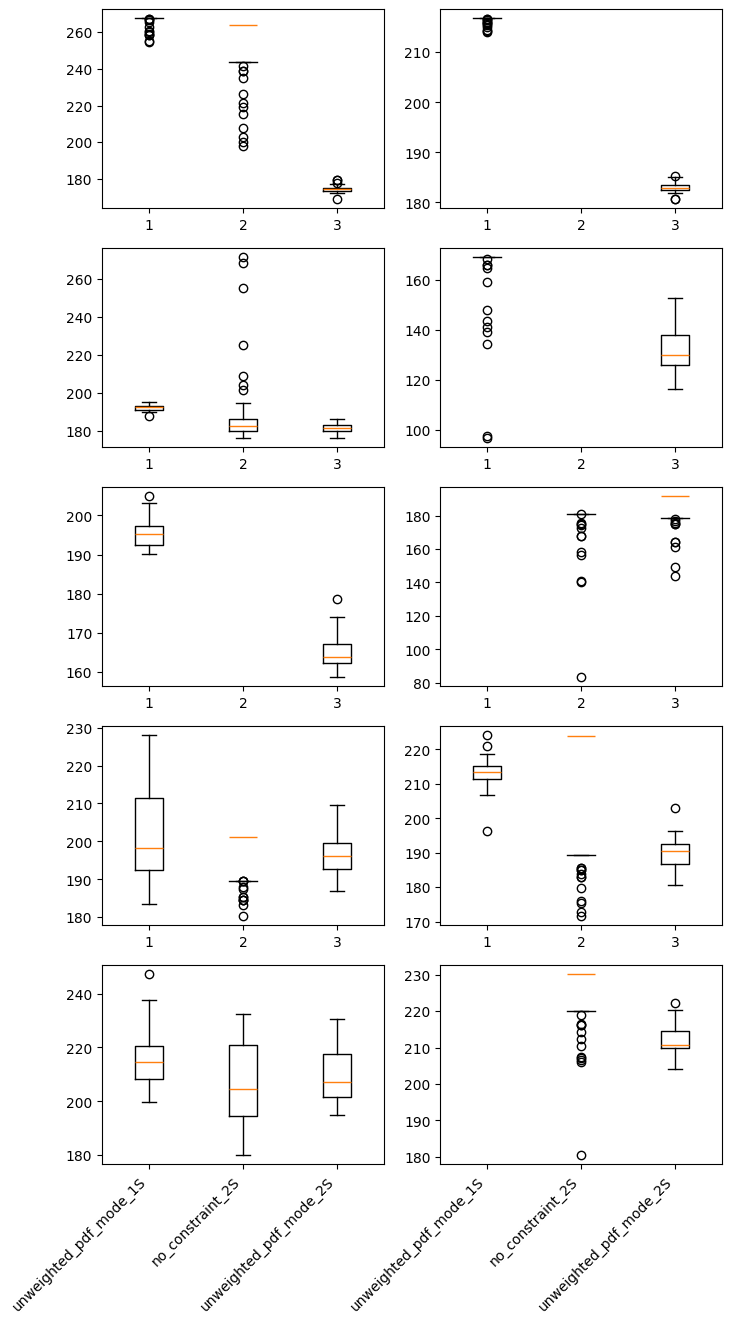

In [61]:
# for i in range(3):
fig = plt.figure(figsize=(8, 3 * 5))

for j in range(10):
    ax = plt.subplot(5, 2, j+1)
    ax.boxplot(take_fdr_thres(take_model(bests[:, j, :].T)))
    if j >= 8:
        ax.set_xticklabels(skeys[0], rotation=45, ha='right')
    # fig.align_labels()

In [ ]:
pickle.dump((skeys, res), open('../bootstrap/res.pickle', 'wb'))

In [ ]:
%%sh
ls